# Chapter 2. 좁은 세상

1. 경로(paths)
2. 연결된 구성요소(connected components)
3. 방향성 경로와 구성요소(directed paths & components)
4. 데이터 세트: US air traffic network

## 1. 경로(paths)

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

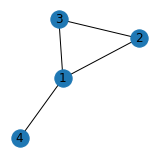

In [32]:
G = nx.Graph()

# 한 번에 몇 개의 노드를 추가할 수 있다.
G.add_nodes_from([1,2,3,4])

# 한 번에 몇 개의 엣지를 추가할 수 있다.
G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

# 그래프를 그린다.
plt.figure(figsize=(2,2)) 
nx.draw(G, with_labels=True)
plt.show()

네트워크의 **경로(paths)** 는 두 노드를 연결하는 일련의 에지다.  
이 간단한 예에서 노드 3과 노드 4를 연결하는 경로가 실제로 하나 이상 있음을 쉽게 확인할 수 있다.  
이를 NetworkX로 확인할 수 있다.

In [33]:
nx.has_path(G, 3, 4)

True

두 노드 사이에 하나 이상의 **경로**가 있을 수 있다.  
다시 노드 3과 노드 4를 고려하면 두 가지 단순 경로가 있다.

In [34]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

단순한 경로는 **사이클(cycle)** 이 없는 경로다.  
사이클(cycle)을 허용하면 항상 원하는 만큼 사이클(cycle)을 돌 수 있기 때문에, 무한히 많은 경로가 있을 것이다.

우리는 종종 **최단 경로(the shortest path)** 에 가장 관심이 있다.  
**비가중 네트워크(unweighted network)** 에서 **최단 경로**는 가장 적은 엣지를 가진 경로다.  
노드 3과 노드 4 사이의 두 단순 경로 중 하나가 다른 것보다 짧다는 것을 알 수 있다.

In [35]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

**경로 길이**에만 관심이 있다면, shortest_path_length 함수를 사용할 수 있다.

In [36]:
nx.shortest_path_length(G, 3, 4)

2

여기에서 노드 u와 노드 v 간의 **경로 길이(path length)** 는 노드 수가 아니라 **경로의 엣지 수**로 정의된다.

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1

## 2. 연결된 구성요소(connected components)

위의 간단한 네트워크에서 **'모든' 노드 쌍에 대해 노드를 연결하는 경로**를 찾을 수 있음을 알 수 있다.  
이것이 **연결 그래프(connected graph)** 의 정의다.  
주어진 그래프에 대해 이 속성을 확인할 수 있다.

In [37]:
nx.is_connected(G)

True

모든 그래프가 연결된 것이 아니다.

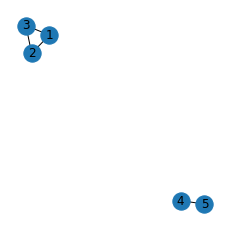

In [38]:
G = nx.Graph()

#nx.add_cycle(G, (1, 2, 3))
nx.add_cycle(G, [1, 2, 3])
G.add_edge(4,5)

plt.figure(figsize=(3,3)) 
nx.draw(G, with_labels=True)
plt.show()

In [39]:
nx.is_connected(G)

False

존재하지 않는 노드 사이의 경로를 요청하면 NetworkX에서 오류가 발생한다.
And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [40]:
nx.has_path(G, 3, 5)

False

In [41]:
nx.shortest_path(G, 3, 5)

NetworkXNoPath: No path between 3 and 5.

시각적으로 그래프에서 **두 개의 연결된 구성요소**를 식별할 수 있다. 이것을 확인해 보자.

In [42]:
nx.number_connected_components(G)

2

nx.connected_components() 함수는 그래프를 가져와 **노드 이름 집합 목록**을 반환한다.  
이러한 집합은 각 연결된 구성요소에 대해 하나씩이다.  
다음 목록의 두 세트가 위 그래프 그림의 연결된 두 구성요소에 해당하는지 확인해 보자.

In [43]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

##### Python 집합  
* 중복 항목이 없는 항목 모음  
* 노드 이름은 고유해야 하므로 노드 이름을 수집하는 데 유용하다.  
* len 함수를 사용하여 세트의 항목 수를 가져올 수 있다.

In [44]:
components = list(nx.connected_components(G))
len(components[0])

3

우리는 종종 네트워크의 핵심이라고도 하는 **가장 큰 연결 구성요소**에 관심을 가진다.  
가장 큰 연결된 구성요소를 얻기 위해 Python의 내장 max 함수를 사용할 수 있다.  
기본적으로 Python의 max 함수는 사전순(즉, 알파벳순)으로 항목을 정렬하므로 여기서는 도움이 되지 않는다.  
크기 순으로 정렬할 때 최대 연결 구성요소를 원하므로 키 함수로 len을 전달한다.

In [45]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

종종 노드 이름 목록만 있으면 충분하지만 때로는 가장 큰 연결된 구성요소로 구성된 **실제 하위 그래프**가 필요하다.  
이것을 얻는 한 가지 방법은 노드 이름 목록을 G.subgraph() 함수에 전달하는 것이다.

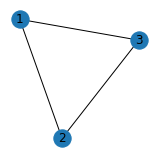

In [46]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

plt.figure(figsize=(2,2)) 
nx.draw(core, with_labels=True)
plt.show()

nx.connected_component_subgraphs() 함수는  
핵심 하위 그래프를 얻는 데에도 사용할 수 있지만  
표시된 방법은 **가장 큰 연결된 구성요소**에만 관심이 있을 때 더 효율적이다.

## 3. 방향성 경로와 구성요소(directed paths & components)

경로 및 연결된 구성요소에 대한 이러한 아이디어를 **방향성 그래프**로 확장해 봅시다.

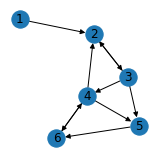

In [47]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])

plt.figure(figsize=(2,2)) 
nx.draw(D, with_labels=True)
plt.show()

### 방향성 경로(directed paths)

우리는 방향성 그래프에서, 임의의 노드 u에서 임의의 노드 v까지의 엣지가 v에서 u까지 엣지가 존재함을 의미하지는 않는다는 것을 알고 있다.  
경로(paths)는 방향성 그래프에서 엣지 방향을 따라야 하므로, 동일한 **비대칭(the same asymmetry)** 이 경로(paths)에 적용된다.  
이 그래프에는 노드 1에서 노드 4까지의 경로가 있지만 반대 방향의 경로는 없다.

In [48]:
nx.has_path(D, 1, 4)

True

In [49]:
nx.has_path(D, 4, 1)

False

경로를 다루는 다른 NetworkX 함수들도 이 **비대칭**을 고려한다.

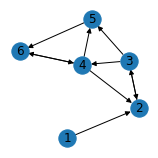

In [50]:
plt.figure(figsize=(2,2)) 
nx.draw(D, with_labels=True)
plt.show()

In [51]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [52]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

노드 5에서 노드 3까지는 엣지가 없기 때문에,  
노드 5에서 노드 2로 가는 최단 경로는 노드 2에서 노드 5까지의 최단 경로를 단순히 역추적할 수 없다.  
노드 6과 노드 4를 통해 더 긴 경로를 거쳐야 한다.

### 방향성 네트워크의 구성요소(Directed components)

방향성(directed) 네트워크에는 두 종류의 **연결(connectivity)** 이 있다.  
**강하게 연결되어 있다**는 것은 **모든 노드 쌍 사이에 방향이 있는 경로가 있음**을 의미한다.  
일방통행 도로 네트워크에 있는 자동차를 생각해 봅시다.  
자동차는 교통 흐름을 거스르지 않고 운전할 수 있다.

In [53]:
nx.is_strongly_connected(D)

False

**약한 연결(Weak connection)** 은 **방향에 관계없이 모든 노드 쌍 사이에 경로가 있음**을 의미한다.  
일방통행로의 네트워크에 있는 보행자에 대해 생각해 봅시다.  
보행자는 인도를 걷기 때문에 차량의 방향에 신경 쓰지 않는다.

In [54]:
nx.is_weakly_connected(D)

True

만약 네트워크가 **강하게 연결되어 있다**면, 이 네트워크는 **약하게 연결되어 있다**고도 말할 수 있다.  
이 예에서 볼 수 있듯이, 그 반대가 항상 참인 것은 아니다.

무향성 그래프의 is_connected 함수는 유향성 그래프가 주어질 때 오류가 발생한다.

In [55]:
nx.is_connected(D)

NetworkXNotImplemented: not implemented for directed type

방향성 그래프의 경우, nx.connected_components 대신 nx.weakly_connected_components와 nx.strongly_connected_components를 사용할 수 있다.

In [56]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [57]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

## 4. 데이터 세트: US air traffic network

In [58]:
#G = nx.read_graphml('../datasets/openflights/openflights_usa.graphml.gz')
G = nx.read_graphml('openflights_usa.graphml.gz')

이 그래프의 노드는 'IATA 코드'로 표시되는 공항이다.  
이 두 공항을 직접 연결하는 정기 항공편이 있는 경우, 두 노드는 에지로 연결된다.  
한 방향으로의 비행은 일반적으로 돌아오는 비행이 있음을 의미하므로, 이 그래프는 방향이 없는 것으로 가정한다.

따라서 이 그래프는 두 개의 공항 3-letter-code로 구성된 엣지들을 가진다.

이 노드들에는 공항에 대한 추가 정보가 포함된 속성들이 연결되어있다.

In [59]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

노드 속성은 dictionary로 저장되므로 값은 다음과 같이 개별적으로 액세스할 수 있다.

In [60]:
G.nodes['IND']['name']

'Indianapolis International Airport'